<h1 style="text-align: center; font-weight: bold;">Artificial Intelligence Course - Fall 1402</h1>
<h1 style="text-align: center; font-weight: bold;">Soheil Hajian Manesh 810100119</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 4 - Machine Learning </h1>

# Problem Description
In this project we should predicts the number of customers' purchases with machine learning algorithm.In 1st phase we create a Linear Regression Model manually.In 2nd phase create Multiple Regression Model using gradient discent and in 3rd phase trying to train model using Scikit-learn library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.impute import KNNImputer

In [2]:
originalDataSet = pd.read_csv("marketing_campaign.csv")
dataSet = originalDataSet.copy()
dataSet.drop(dataSet.columns[0], axis=1, inplace=True)
display(dataSet)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,88,546,172,88,88.0,NaN,0,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,NaN,1,6,2,1,6.0,5.0,0,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,NaN,49,127,111,21,42.0,NaN,0,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,4,20,10,3,5.0,6.0,0,8,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,43,118,46,27,15.0,5.0,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,43,182,42,118,247.0,5.0,0,18,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,0,30,0,0,8.0,7.0,0,22,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,48,217,32,12,24.0,6.0,0,19,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,30,214,80,30,61.0,NaN,0,23,0


In [3]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2017 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2035 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2227 non-null   float64
 15  NumWebVisitsMonth  2040 non-null   float64
 16  Complain           2240 

In [4]:
dataSet.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [5]:
null_analysis_data = []
for col in dataSet.columns:
    nullCount = dataSet[col].isnull().sum()
    nullRatio = round(nullCount / dataSet.shape[0],2)
    null_analysis_data.append({"Feature": col, "Count": nullCount, "Ratio": nullRatio})
nullAnalysisTable = pd.DataFrame(null_analysis_data)
display(nullAnalysisTable)

,Feature,Count,Ratio
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
4,Income,223,0.10
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntCoffee,205,0.09


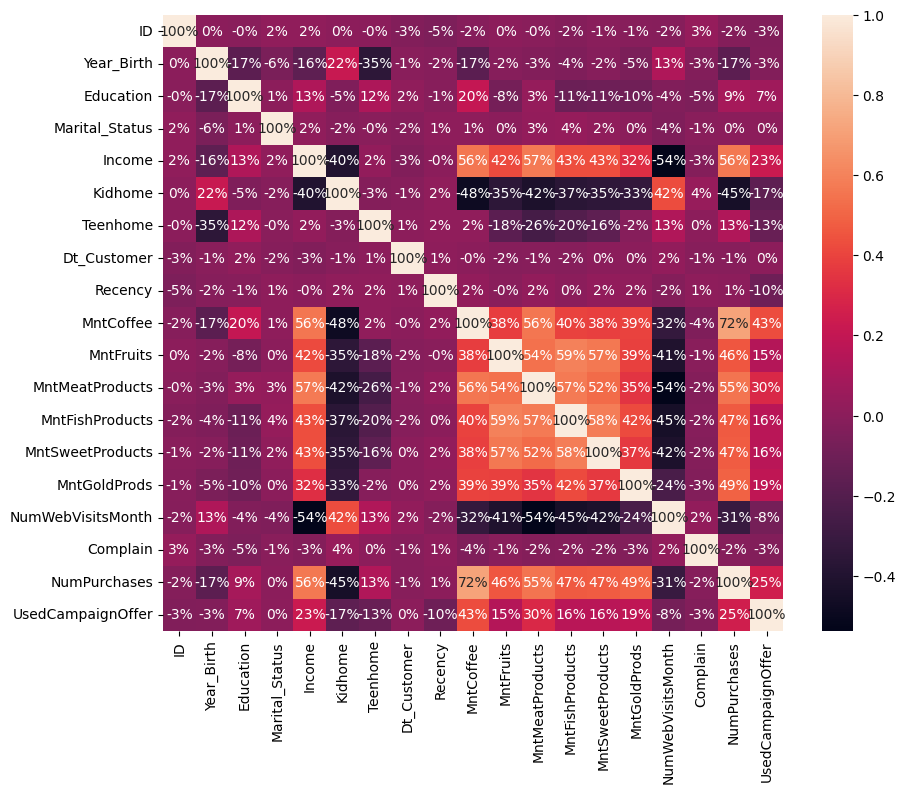

Features with correlation value bigger than 50% is :
['Income', 'MntCoffee', 'MntMeatProducts', 'MntGoldProds']


In [6]:
label_encoder = LabelEncoder()
for col in dataSet.select_dtypes(include=[object]).columns:
    dataSet[col] = label_encoder.fit_transform(dataSet[col])
corrMatrix = dataSet.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corrMatrix, annot=True, fmt=".0%")
plt.show()
bestFeatures = (corrMatrix["NumPurchases"] > 0.49) & (corrMatrix["NumPurchases"] != 1)
bestFeatures = bestFeatures[bestFeatures].index
print("Features with correlation value bigger than 50% is :")
print(bestFeatures.to_list())

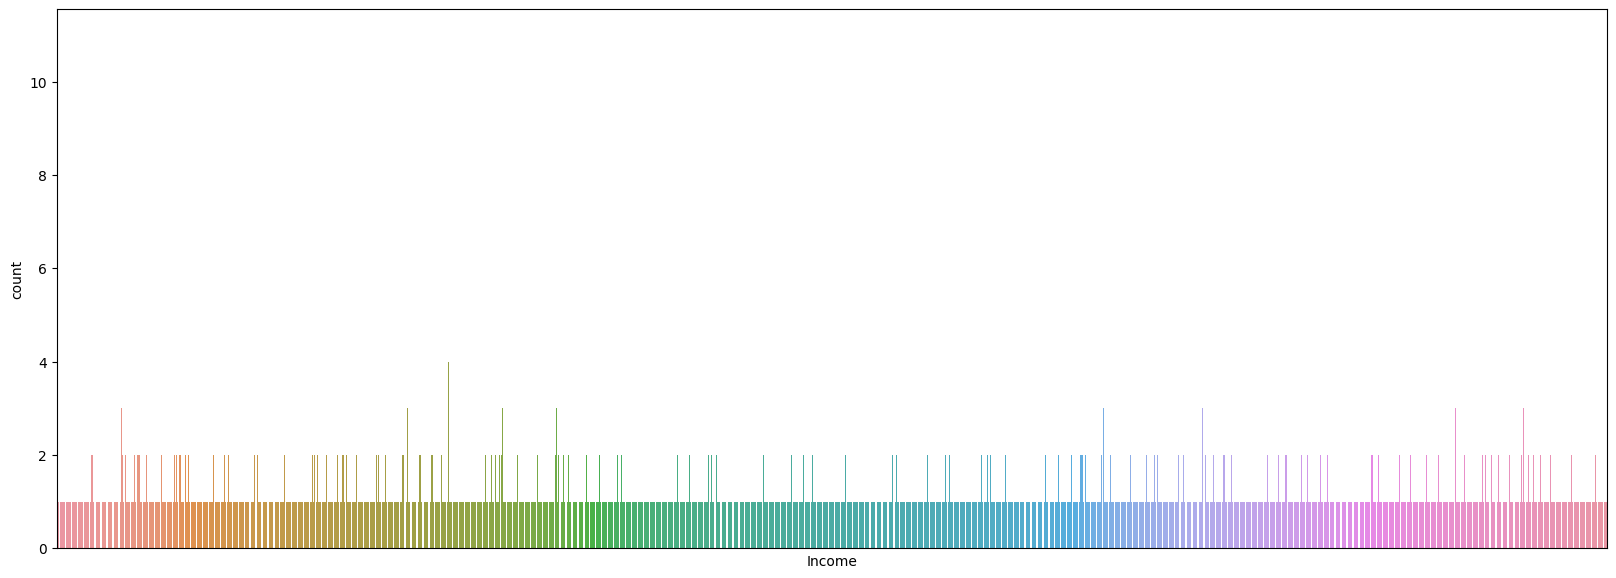

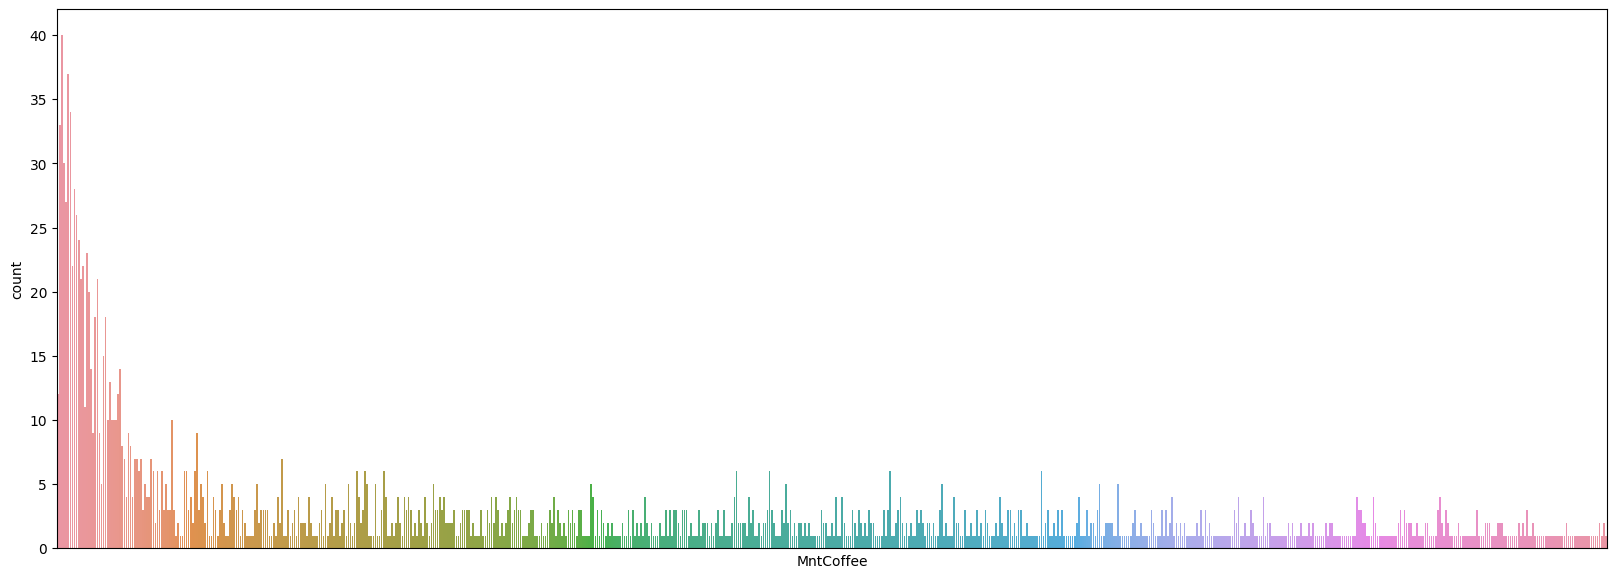

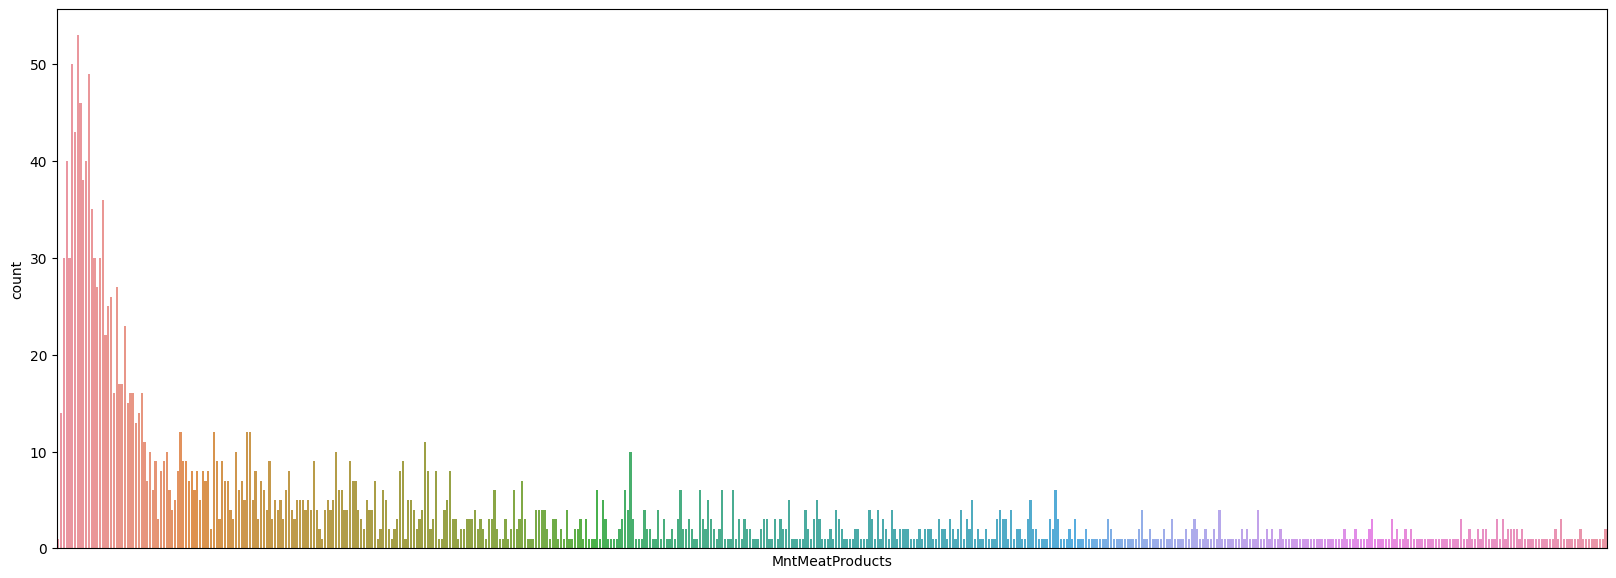

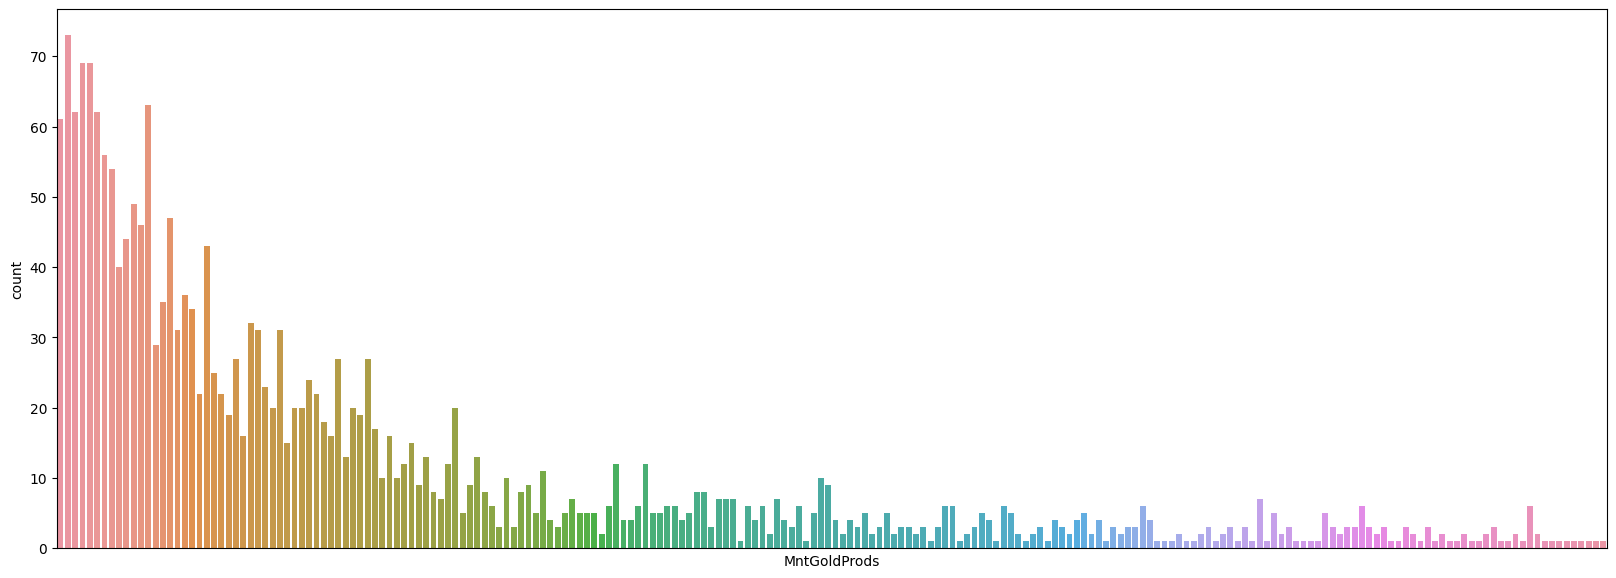

In [7]:
for feature in bestFeatures:
    plt.figure(figsize=(20, 7))
    plt.xticks(rotation=90)
    sb.countplot(data=dataSet, x=feature)
    plt.xticks(ticks=[], labels=[])

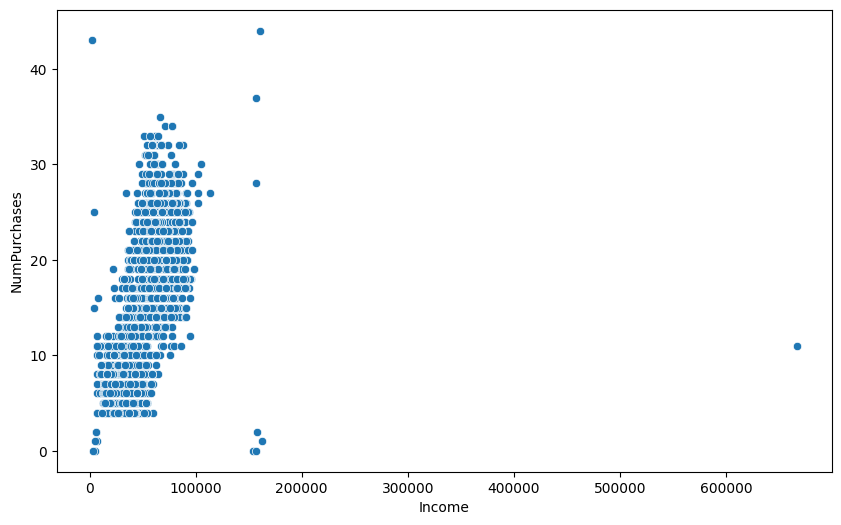

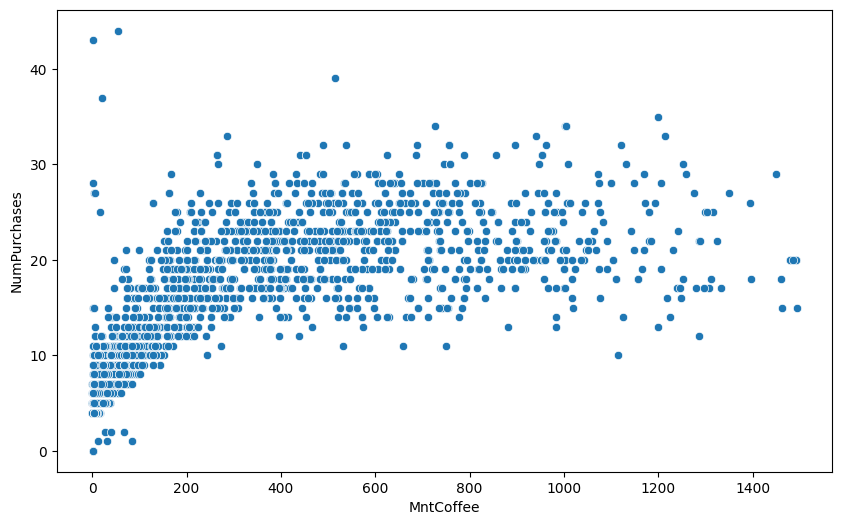

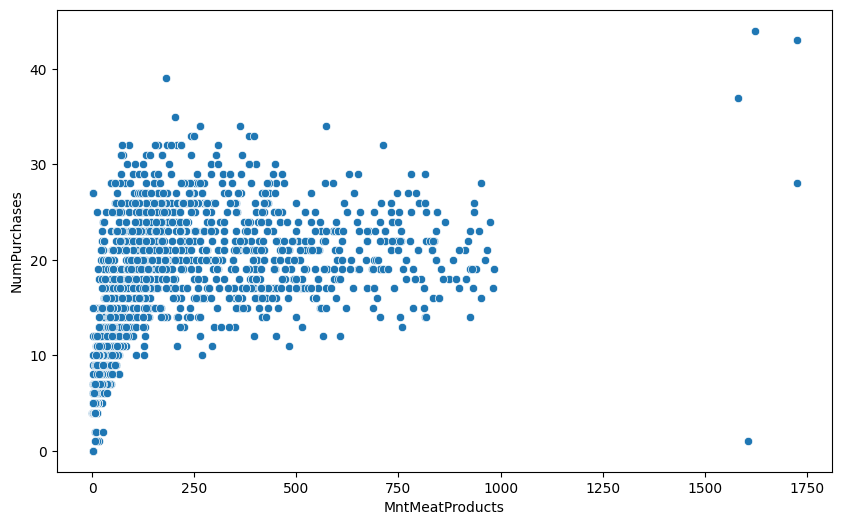

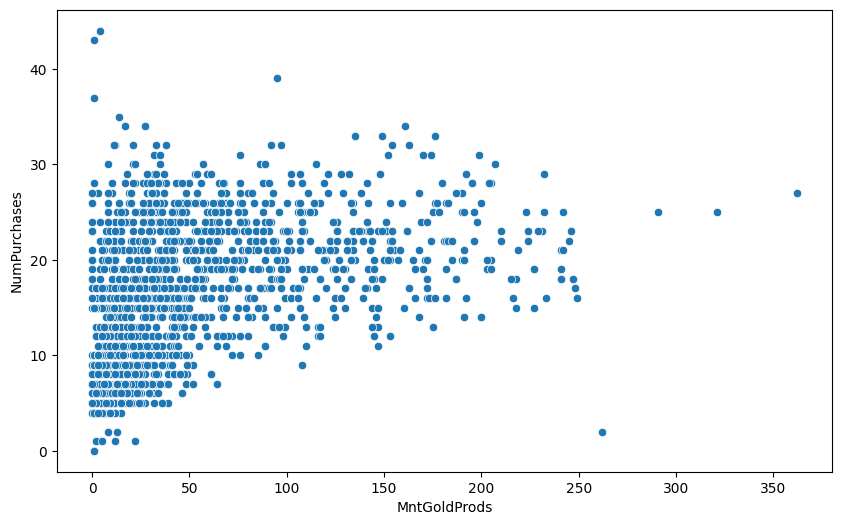

In [8]:
for feature in bestFeatures:
    plt.figure(figsize=(10,6))
    sb.scatterplot(data=dataSet, x=feature, y="NumPurchases")

## Preprocessing

### Question 7: Ways to handle missing values.
There are many ways to handle missing values, I describe some of them below:   
- Deleting the entire row:     
    > If a row has many missing values, you can drop the entire row.The disadvantage of this method is one might end up deleting some useful data from the dataset.
- Deleting the entire column:
    > If a certain column has many missing values, then you can choose to drop the entire column.The disadvantage of this method is same as previous one.
- Replacing with the mean:
    > If there are outliers, then the mean will not be appropriate. In such cases, outliers need to be treated first.
- Replacing with mode:
    > It is used in the case of categorical features.
- Replacing with median:
    > It’s better to use the median value for imputation in the case of outliers.     
- Nearest Neighbors Imputations (KNNImputer):
    > Missing values are imputed using the k-Nearest Neighbors approach, where a Euclidean distance is used to find the nearest neighbors.

Replacing missing values with mean,median or mode have risk of losing the variance and changing the distribution of the data.The best spproach is `KNNImputer`.

From observation in previous phase these 4 features have missing values:   
1. Income
2. MntCoffee
3. MntGoldProds
4. NumWebVisitsMonth
I am trynig to handle missing values using `Delete row` and  `KNNImputer` approach.For `MntGoldProds` column because only 13 rows have missing value I delete these rows and then with KNNImputer fill other missing values.

In [9]:
dataSet.dropna(subset=['MntGoldProds'],inplace=True)

In [10]:
imputeKnn = KNNImputer(n_neighbors=4)
imputed = imputeKnn.fit_transform(dataSet)
dataSet = pd.DataFrame(imputed, columns=dataSet.columns)
display(dataSet)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,5524.0,1957.0,2.0,4.0,58138.0,0.0,0.0,80.0,58.0,635.00,88.0,546.0,172.0,88.0,88.0,1.50,0.0,25.0,1.0
1,2174.0,1954.0,2.0,4.0,46344.0,1.0,1.0,157.0,38.0,32.75,1.0,6.0,2.0,1.0,6.0,5.00,0.0,6.0,0.0
2,4141.0,1965.0,2.0,5.0,71613.0,0.0,0.0,444.0,26.0,102.75,49.0,127.0,111.0,21.0,42.0,6.25,0.0,21.0,0.0
3,6182.0,1984.0,2.0,5.0,26646.0,1.0,0.0,199.0,26.0,11.00,4.0,20.0,10.0,3.0,5.0,6.00,0.0,8.0,0.0
4,5324.0,1981.0,4.0,3.0,58293.0,1.0,0.0,390.0,94.0,173.00,43.0,118.0,46.0,27.0,15.0,5.00,0.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10870.0,1967.0,2.0,3.0,61223.0,0.0,1.0,272.0,46.0,709.00,43.0,182.0,42.0,118.0,247.0,5.00,0.0,18.0,0.0
2223,4001.0,1946.0,4.0,5.0,64014.0,2.0,1.0,207.0,56.0,406.00,0.0,30.0,0.0,0.0,8.0,7.00,0.0,22.0,1.0
2224,7270.0,1981.0,2.0,2.0,56981.0,0.0,0.0,521.0,91.0,908.00,48.0,217.0,32.0,12.0,24.0,6.00,0.0,19.0,1.0
2225,8235.0,1956.0,3.0,5.0,69245.0,0.0,1.0,500.0,8.0,428.00,30.0,214.0,80.0,30.0,61.0,5.50,0.0,23.0,0.0


### Question 9 : Why Use Normalization and Standardizing?
`Normalization` is a data preprocessing technique used to adjust the values of features in a dataset to a common scale. This is done to facilitate data analysis and modeling, and to reduce the impact of different scales on the accuracy of machine learning models.Useful when the distribution of the data is unknown or not Gaussian.     
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between a fixed range for example 0 and 1. It is also known as Min-Max scaling.        
Here’s the formula for normalization:   $$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
`Standardization` is another scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.     
Here’s the formula for normalization: $$X_{std} = \frac{X - \mu}{\sigma}$$

In [14]:
standardized = scale(dataSet.drop(axis=1, columns="NumPurchases"))
standardized = pd.DataFrame(
    standardized, columns=dataSet.drop(axis=1, columns="NumPurchases").columns
)
standardized["NumPurchases"] = dataSet["NumPurchases"]
standardized.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,UsedCampaignOffer,NumPurchases
count,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2.227000e+03,2227.000000
mean,-1.340045e-16,-8.075364e-15,-1.914350e-17,1.020986e-16,8.215750e-17,4.706109e-17,8.614573e-17,2.871524e-17,-1.156586e-16,5.902578e-17,2.632231e-17,-3.190583e-18,-4.706109e-17,9.571748e-18,-7.976456e-18,4.466816e-17,-5.583519e-18,1.148610e-16,14.851370
std,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,7.661405
min,-1.726475e+00,-6.384082e+00,-2.128925e+00,-3.463682e+00,-1.979561e+00,-9.643351e+00,-9.299539e-01,-1.723366e+00,-1.697836e+00,-9.125024e-01,-6.618085e-01,-7.387175e-01,-6.863287e-01,-6.574873e-01,-8.450882e-01,-2.240730e+00,-9.756789e-02,-6.121204e-01,0.000000
25%,-8.502303e-01,-8.272722e-01,-3.502284e-01,-6.779760e-01,-6.734471e-01,-7.756729e-01,-9.299539e-01,-8.652291e-01,-8.687349e-01,-8.334618e-01,-6.240813e-01,-6.678024e-01,-6.314746e-01,-6.331278e-01,-6.716291e-01,-6.647414e-01,-9.756789e-02,-6.121204e-01,8.000000
50%,-3.902984e-02,9.886284e-02,-3.502284e-01,2.505926e-01,-4.832784e-02,-7.756729e-01,-9.299539e-01,-7.092022e-03,-5.088032e-03,-3.683379e-01,-4.605972e-01,-4.417605e-01,-4.669124e-01,-4.626114e-01,-3.825307e-01,2.808520e-01,-9.756789e-02,-6.121204e-01,15.000000
75%,8.735900e-01,6.882215e-01,5.391201e-01,1.179161e+00,6.395665e-01,9.978626e-01,9.060455e-01,8.299865e-01,8.585588e-01,5.801500e-01,1.681880e-01,2.873353e-01,2.279059e-01,1.463757e-01,2.342126e-01,7.011158e-01,-9.756789e-02,1.633666e+00,21.000000
max,1.723324e+00,2.287909e+00,1.428469e+00,3.036299e+00,2.451119e+01,2.771398e+00,2.742045e+00,1.761829e+00,1.722206e+00,3.626255e+00,4.343322e+00,6.906816e+00,4.049407e+00,5.749057e+00,6.131820e+00,6.164544e+00,1.024927e+01,1.633666e+00,44.000000



### Question 10: Ways for category encoding.
There are many ways to encode categorical datas, I describe some of them below:     
- Label Encoding: Assign a number to each category
    > We use this technique when the categorical feature is ordinal. In this case, retaining the order is important.For example in Education column Encoding like below:     
    > Graduation : 0     
    > Master : 1     
    > PHD : 2     
- One-Hot Encoding: assign a feature to each category
    > We use this categorical data encoding technique when the features are nominal(do not have any order).Each cell contain 0 or 1, 0 for absence and 1 for present that category.For example suppose wh have 3 different city as category:Tehran,Dubai,London so we these features:    
    > Tehran:0 1 0   
    > Dubai:1 0 0   
    > London:0 0 1   
- Binary Encoding: Encode the categories using binary numbers.
    > This method is useful when the categories don't have an order. It is somehow similar to the `One-Hot Encoding` method. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 00  
    > Category 2: 01  
    > Category 3: 10
- Target Encoding: Encode the categories using the target mean of the categories.
    > This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.75


# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [ ]:
def simple_linear_regression(input_feature, output):
    # ToDo
    pass

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [ ]:
def get_regression_predictions(input_feature, bias, slope):
    # ToDo
    pass

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [ ]:
def get_root_mean_square_error(predicted_values, outputs):
    # ToDo
    pass

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [ ]:
def get_r2_score(predicted_values, outputs):
    # ToDo
    pass

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [ ]:
designated_feature_list = [] # ToDo

# ToDo
#  measure the performance of the simple linear regression model

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [ ]:
def predict_output(feature_matrix, weights, bias):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    # ToDo
    pass

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [ ]:
def feature_derivative(errors, feature):
    # ToDo
    pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [ ]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    # ToDo
    pass

In [ ]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    #  Explain your answer.
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    chosen_feature_dataframe = train_x[chosen_features]
    # ToDo
    #  Why are the features normalized?
    chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = train_y
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [ ]:
chosen_features = [] # ToDo
# ToDo
# compute the chosen_feature_matrix, train_weights, and bias

In [ ]:
#ToDo
# compute the predictions

In [ ]:
#ToDo
# Calculate the R2 score and mean square error
# Explain the results

## Three Feature Regression

Now repeat the steps for 3 features

In [ ]:
# ToDo

## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [ ]:
# ToDo